# BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.cluster import Birch
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
for k in range(2, 11):
    birch = Birch(n_clusters=k)
    cluster_labels = birch.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))

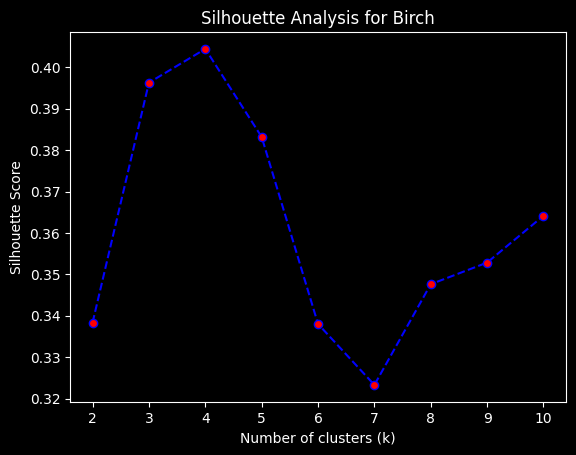

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Birch")
plt.savefig("Images/Silhouette_Analysis.png", bbox_inches="tight")

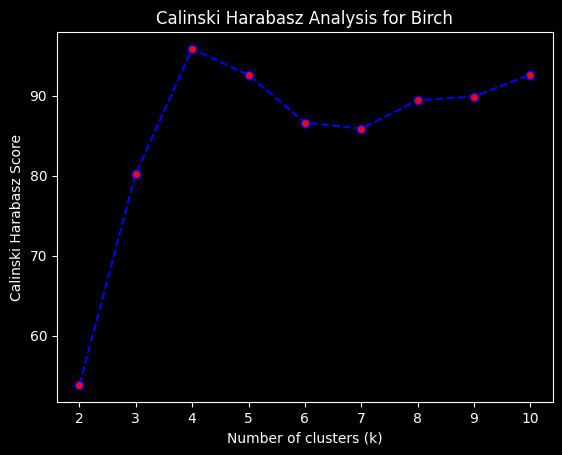

In [5]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for Birch")
plt.savefig("Images/Calinski_Harabasz_Analysis.png", bbox_inches="tight")

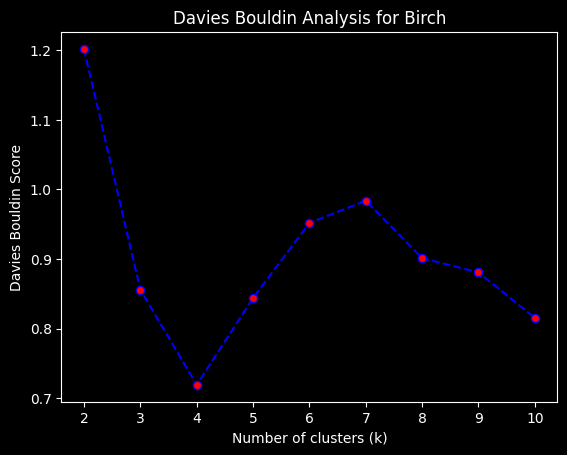

In [6]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for Birch")
plt.savefig("Images/Davies_Bouldin_Analysis.png", bbox_inches="tight")

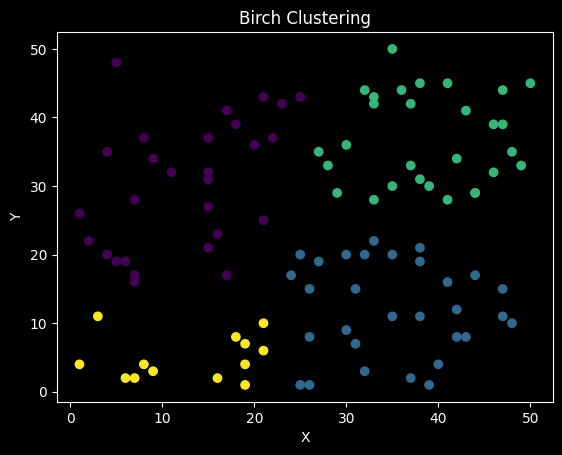

In [7]:
birch = Birch(n_clusters=4)
cluster_labels = birch.fit_predict(df)
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Birch Clustering")
plt.savefig("Images/Birch.png", bbox_inches="tight")

In [8]:
silhouette_score(df, cluster_labels)

np.float64(0.404444742714164)

In [9]:
calinski_harabasz_score(df, cluster_labels)

np.float64(95.84779533416489)

In [10]:
davies_bouldin_score(df, cluster_labels)

np.float64(0.7193843992939621)

In [11]:
dump(birch, "../../../Models/BIRCH.joblib")

['../../../Models/BIRCH.joblib']